In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
import sklearn.linear_model as lm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [292]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [293]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [294]:
print("Percentage of Null values in each column: ")
display((df.isnull().sum()/len(df))*100)

Percentage of Null values in each column: 


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [295]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


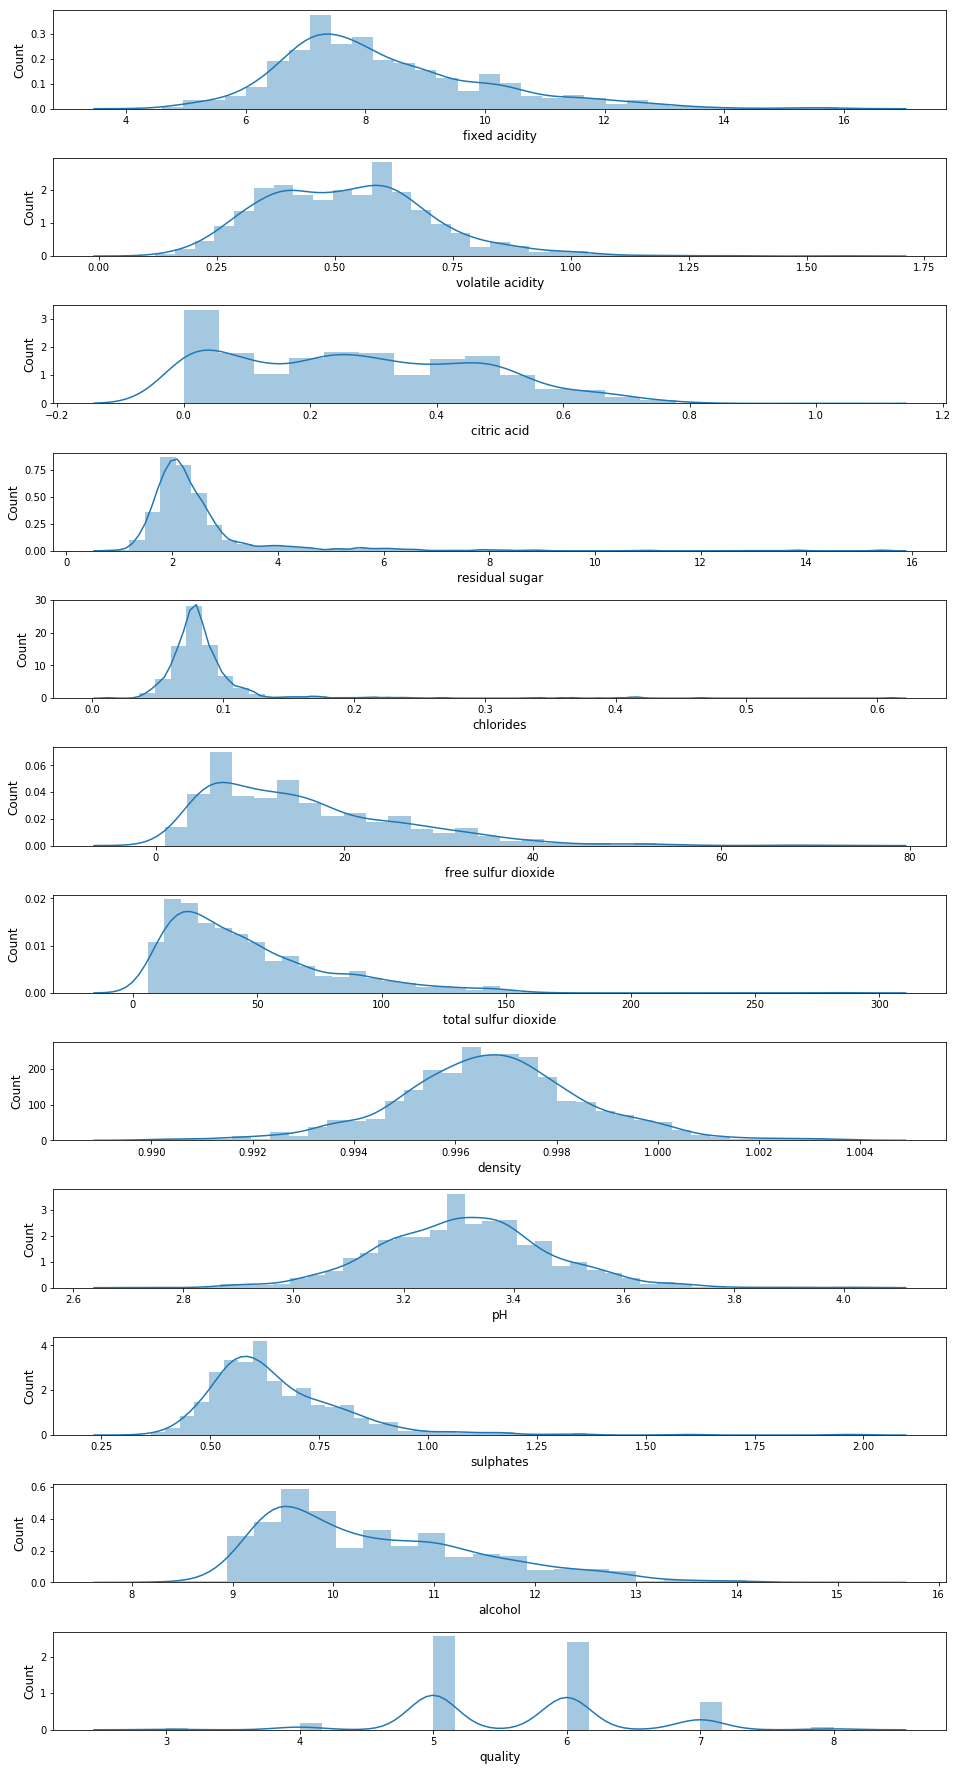

In [296]:
# check for skewness
col_names = df.columns

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)

plt.subplots_adjust(bottom = 0.01, top = 2, hspace = 0.5 )
plt.show()

In [297]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


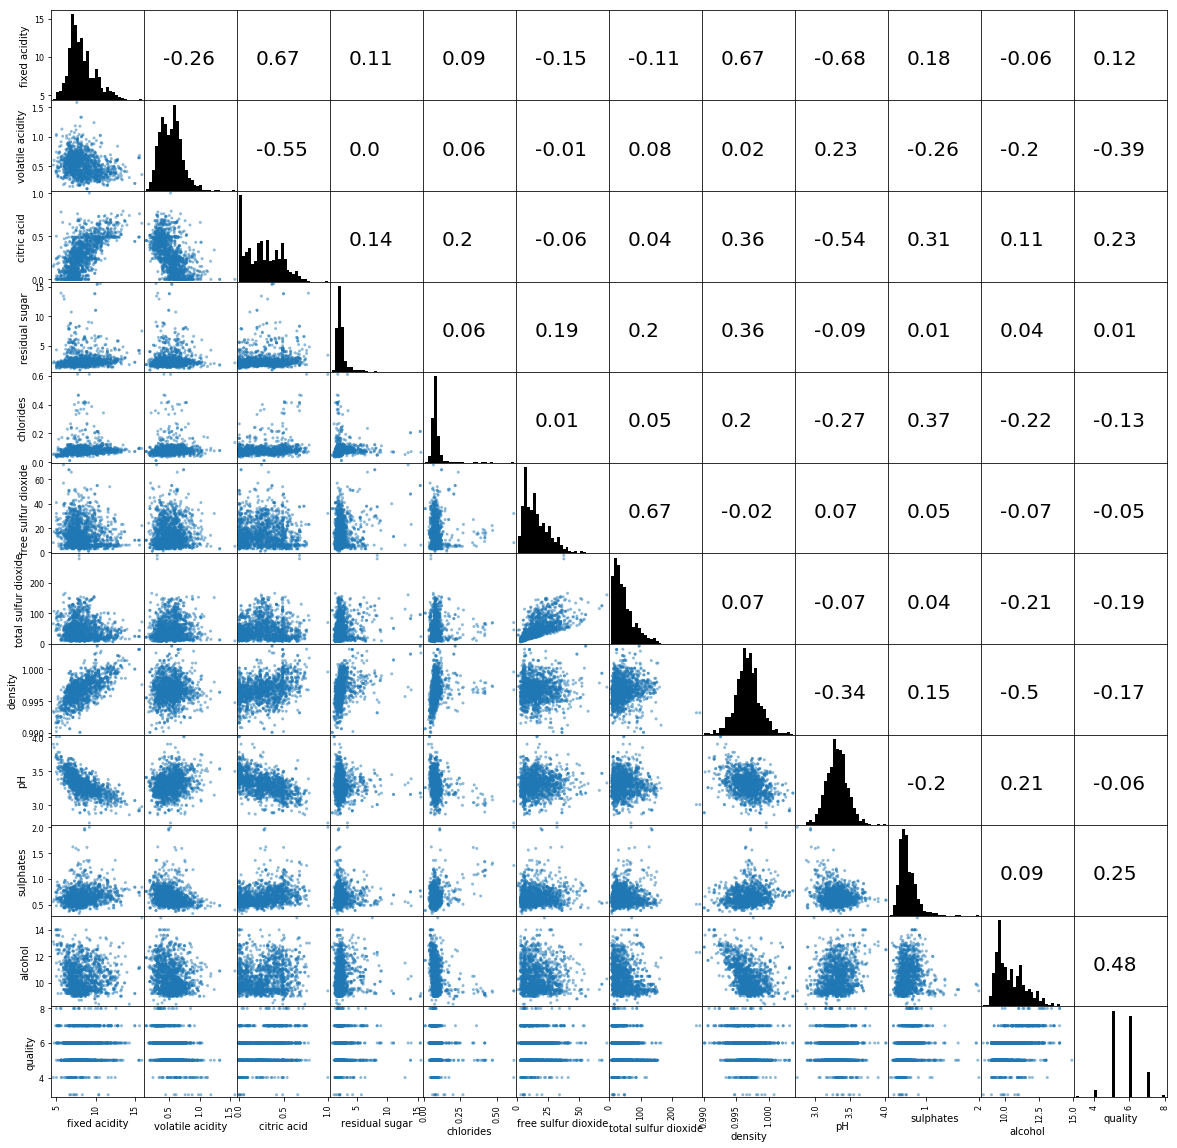

In [77]:
labs = df.columns
axarr = scatter_matrix(df[labs],figsize=(20,20),hist_kwds={'bins':30,'color':'black'}) # create scatter plots and histograms

# the plots in the upper-right corner are repetitive, so replace this with correlations for quicker analysis
for i,axlist in enumerate(axarr):
    for j,ax in enumerate(axlist):
        if i<j:
            ax.cla() # clears an Axes object
            ax.text(x=0.8*ax.get_xlim()[0]+0.2*ax.get_xlim()[1],y=0.6*ax.get_ylim()[0]+0.4*ax.get_ylim()[1],
                    s=np.round(np.corrcoef(df[labs[i]],df[labs[j]])[0,1],2),fontsize=20) # adds text to an Axes object


In [298]:
X = df.iloc[:, :-1 ]
y = df.iloc[:,-1:]

In [299]:
standardized_X = preprocessing.scale(X)

## OLS  

##### No Train Test Split

In [148]:
ols_model = lm.LinearRegression()

In [149]:
ols_model.fit(standardized_X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
OLS_coefficients_array = np.append(ols_model.coef_, ols_model.intercept_)
indices = np.append(X.columns,"intercept")
OLS_coefficients = pd.DataFrame(OLS_coefficients_array,index = indices).rename(columns = {0: "coefficients"})
OLS_coefficients

,coefficients
fixed acidity,0.043497
volatile acidity,-0.193967
citric acid,-0.035553
residual sugar,0.023019
chlorides,-0.088183
free sulfur dioxide,0.045606
total sulfur dioxide,-0.107356
density,-0.033737
pH,-0.063842
sulphates,0.155277


In [153]:
np.mean(cross_val_score(ols_model, standardized_X, y, scoring='neg_mean_squared_error', cv=5))

-0.4366293880320982

## RIDGE

In [300]:
ridge = Ridge()

In [301]:
alphas = np.arange(0.1, 100, 0.05)

In [302]:
parameters = {'alpha': alphas}

In [303]:
r_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv = 5)

In [304]:
r_regressor.fit(standardized_X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([ 0.1 ,  0.15, ..., 99.9 , 99.95])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [305]:
r_regressor.best_score_

-0.43533034290183703

In [306]:
r_regressor.best_index_

1685

In [323]:
alphas[r_regressor.best_index_]

84.35000000000002

In [314]:
scores_mean = r_regressor.cv_results_['mean_test_score']

In [325]:
min(-1*scores_mean)

0.43533034290183703

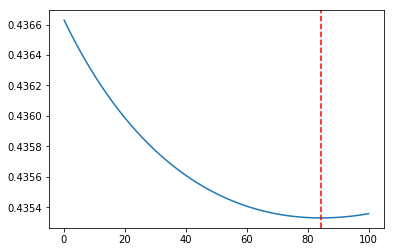

In [326]:
 _, ax = plt.subplots(1,1)
ax.plot(alphas, -1*scores_mean)
plt.axvline(x=alphas[r_regressor.best_index_], color='red', linestyle='dashed')

## Lasso

In [318]:
lasso = Lasso()

In [319]:
aplhas = np.arange(0.0001, 0.1, 0.00005)

In [320]:
parameters = {'alpha': aplhas}

In [321]:
l_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

In [322]:
l_regressor.fit(standardized_X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.0001 , 0.00015, ..., 0.0999 , 0.09995])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [327]:
l_regressor.best_params_

{'alpha': 0.004700000000000001}

In [328]:
l_regressor.best_score_

-0.4356902226391317

In [329]:
l_regressor.best_index_

92

In [330]:
aplhas[l_regressor.best_index_]

0.004700000000000001

In [335]:
l_scores_mean = l_regressor.cv_results_['mean_test_score']

In [337]:
max(l_scores_mean)

-0.4356902226391317

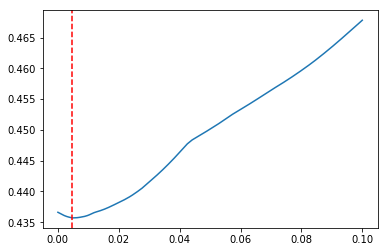

In [334]:
 _, ax = plt.subplots(1,1)
ax.plot(aplhas, -1*l_scores_mean)
plt.axvline(x=aplhas[92], color='red', linestyle='dashed')